In [1]:
import folium
import geopandas as gpd
import os
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import numpy as np
import matplotlib.pyplot as plt
import geojson
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import MultiPolygon, Polygon
from osgeo import gdal

In [2]:
os.getcwd()

'C:\\Users\\amans\\OneDrive\\Desktop\\State of place'

Visualise the map with boundary

In [3]:
m = folium.Map([40.8, -74], zoom_start=11)
bounds = gpd.read_file(r'nybounds.geojson')
folium.GeoJson(bounds).add_to(m)
m

In [4]:
footprint = None
for i in bounds['geometry']:
    footprint = i
    
user = 'aman_sop' 
password = 'abcd1234'

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

print (footprint)

LINESTRING (-73.92459869384766 40.87666059992976, -73.9105224609375 40.87432421954122, -73.88442993164063 40.86627605595889, -73.817138671875 40.85173495823773, -73.81473541259766 40.83199550584334, -73.8006591796875 40.81796653313175, -73.80409240722655 40.81251002009193, -73.82846832275391 40.8104312304102, -73.83567810058594 40.80523397126979, -73.84117126464844 40.81952545442639, -73.84597778320313 40.81095093393647, -73.84872436523438 40.80601358609009, -73.85936737060547 40.80549384389415, -73.87378692626952 40.80185553455111, -73.89507293701172 40.80809251416925, -73.91326904296874 40.79431840216349, -73.92562866210938 40.78184126814031, -73.95652770996094 40.76208101161184, -73.97472381591797 40.73581157695217, -73.97678375244141 40.71343536379427, -74.01180267333984 40.70172388214517, -74.01695251464844 40.70432661161239, -74.01351928710938 40.72358364851732, -74.00871276855469 40.75219867966512, -73.95206451416014 40.83329433468369, -73.92665863037109 40.8764010061807)


In [5]:
products = api.query(footprint,
                     date = ('20200609', '20200610'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


b8b7d14f-7b23-4661-83e5-adcc17d9bf83    Annotation(-74.3569, 41.0611, 'b8b7d14f-7b23-4...
dtype: object

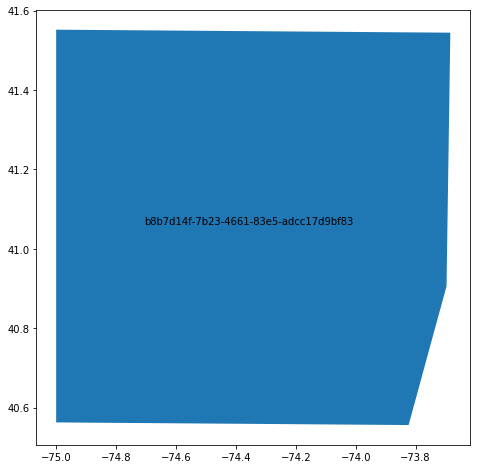

In [6]:
areas = api.to_geodataframe(products)
ax = areas.plot(column='uuid', cmap=None, figsize=(8,8))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [7]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


title  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_2...   

                                                                                   link  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                                summary  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  Date: 2020-06-09T15:49:11.024Z, Instrument: MS...   

                                               beginposition  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83 2020-06-09 15:49:11.024   

                                                 endposition  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83 2020-06-09 15:49:11.024   

                                               ingestiondate  orbitnumber  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83 2020-06-10 01:19:26.504        25934   

                                      relativeorbitnumber  ...     size  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83                   54  ...  1.11 GB   

                                                            s2datatakeid  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  GS2A_20200609T154911_025934_N02.14   

                                      producttype  platformidentifier  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83      S2MSI2A           2015-028A   

                                      orbitdirection  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83      DESCENDING   

                                      platformserialidentifier  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83               Sentinel-2A   

                                      processinglevel  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83         Level-2A   

                                                                             identifier  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_2...   

                                                                      uuid  \
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  b8b7d14f-7b23-4661-83e5-adcc17d9bf83   

                                                                               geometry  
b8b7d14f-7b23-4661-83e5-adcc17d9bf83  MULTIPOLYGON (((-73.82303 40.55614, -73.80422 ...  

[1 rows x 35 columns]

In [126]:
api.download('b8b7d14f-7b23-4661-83e5-adcc17d9bf83')

Downloading: 100%|████████████████████████████████████████████████████████████████| 1.19G/1.19G [17:24<00:00, 1.15MB/s]
MD5 checksumming: 100%|███████████████████████████████████████████████████████████| 1.19G/1.19G [00:18<00:00, 65.2MB/s]


{'id': 'b8b7d14f-7b23-4661-83e5-adcc17d9bf83',
 'title': 'S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_20200609T201659',
 'size': 1188684154,
 'md5': '41E92553BD2E25DED8188F668923573A',
 'date': datetime.datetime(2020, 6, 9, 15, 49, 11, 24000),
 'footprint': 'POLYGON((-73.69643392299747 40.90569382941853,-73.69834274241987 40.900438749076,-73.75140629973073 40.75436506941089,-73.80421508850195 40.608223359175554,-73.82303093989755 40.55614460129639,-75.00023625343321 40.56274991351036,-75.00023981916341 41.551844670066835,-73.68379957458711 41.54431153543986,-73.69643392299747 40.90569382941853))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('b8b7d14f-7b23-4661-83e5-adcc17d9bf83')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2020, 6, 10, 1, 20, 9, 937000),
 'Ingestion Date': datetime.datetime(2020, 6, 10, 1, 19, 26, 504000),
 'path': '.\\S2A_MSIL2A_20200609T154911_N0214_R054_T18TWL_20200609T201659.zip',
 'downloaded_bytes': 1188684154}

In [11]:
R10 = r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\GRANULE\L2A_T18TWL_A025934_20200609T155403\IMG_DATA\R10m'
b2 = rasterio.open(R10+ '\T18TWL_20200609T154911_B02_10m.jp2') #blue
b3 = rasterio.open(R10+ '\T18TWL_20200609T154911_B03_10m.jp2') #green
b4 = rasterio.open(R10+ '\T18TWL_20200609T154911_B04_10m.jp2') #red
b8 = rasterio.open(R10+ '\T18TWL_20200609T154911_B08_10m.jp2') #nir

with rasterio.open('NY.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),3) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),1) 
    rgb.close()

In [12]:
ny = rasterio.open('NY.tiff')
ny.crs

CRS.from_epsg(32618)

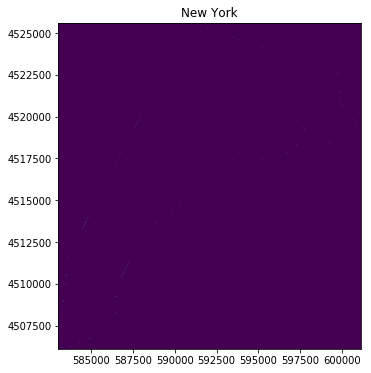

In [14]:
bounds_proj = bounds.to_crs({'init': 'epsg:32618'})

with rasterio.open("NY.tiff") as src:
    out_image, out_transform = mask(src, bounds_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("NY_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\NY_masked.tif')
plt.figure(figsize=(6,6))
plt.title('New York')
plot.show(src, adjust='linear')

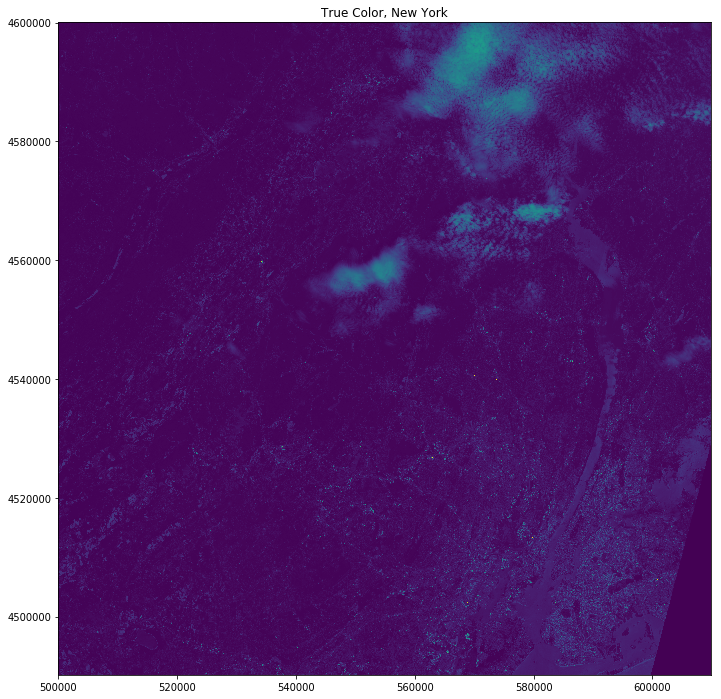

In [15]:
trueColor = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\Output\SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=b4.width, height=b4.height,
                         count=3,
                         crs=b4.crs,
                         transform=b4.transform,
                         dtype=b4.dtypes[0]
                         )
trueColor.write(b2.read(1),3) #blue
trueColor.write(b3.read(1),2) #green
trueColor.write(b4.read(1),1) #red
trueColor.close()

src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\Output\SentinelTrueColor2.tiff')
plt.figure(figsize=(12,12))
plt.title('True Color, New York')
plot.show(src, adjust='linear')

In [16]:
#export false color image
falseColor = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\Output\SentinelFalseColor.tiff', 'w', driver='Gtiff',
                          width=b2.width, height=b2.height,
                          count=3,
                          crs=b2.crs,
                          transform=b2.transform,
                          dtype='uint16'                   
                         )
falseColor.write(b3.read(1),3) #Blue
falseColor.write(b4.read(1),2) #red
falseColor.write(b8.read(1),1) #nir
falseColor.close()

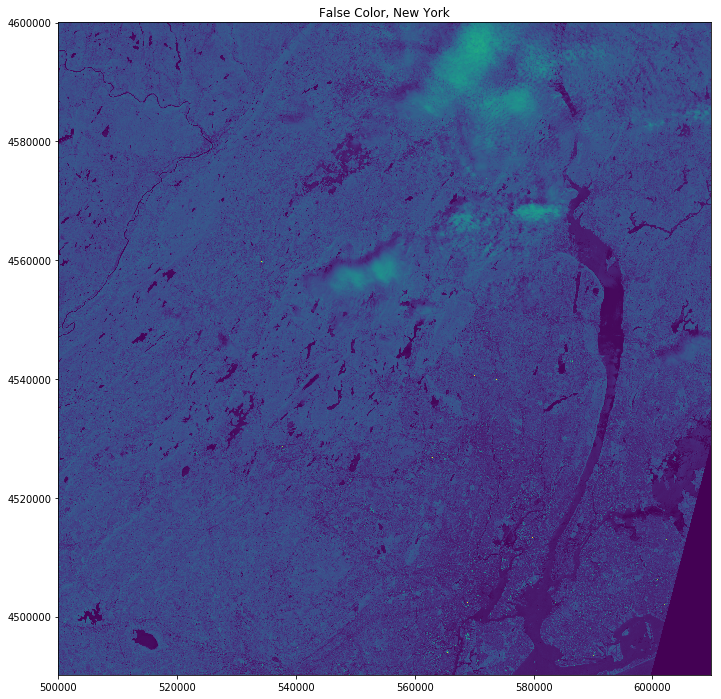

In [17]:
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\Ny_sentinel\Output\SentinelFalseColor.tiff')
plt.figure(figsize=(12,12))
plt.title('False Color, New York')
plot.show(src, adjust='linear')

Los Angeles

In [18]:
m = folium.Map([34, -118.2], zoom_start=10)
labounds = gpd.read_file(r'C:\Users\amans\OneDrive\Desktop\State of place\Labound\POLYGON.shp')
folium.GeoJson(labounds).add_to(m)
m

In [19]:
fp_la = None
for i in labounds['geometry']:
    fp_la = i

In [20]:
products = api.query(fp_la,
                     date = ('20190601', '20190726'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,20)
                    )

In [21]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['uuid'], ascending=[True])
products_gdf_sorted

title  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_2...   

                                                                                   link  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                                summary  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  Date: 2019-06-28T18:29:29.024Z, Instrument: MS...   

                                               beginposition  \
305fb15f-3fa1-42de-8e6d-3dda8635e698 2019-06-28 18:29:29.024   

                                                 endposition  \
305fb15f-3fa1-42de-8e6d-3dda8635e698 2019-06-28 18:29:29.024   

                                               ingestiondate  orbitnumber  \
305fb15f-3fa1-42de-8e6d-3dda8635e698 2019-06-29 11:29:13.869        12065   

                                      relativeorbitnumber  ...  \
305fb15f-3fa1-42de-8e6d-3dda8635e698                   27  ...   

                                      processingbaseline  processinglevel  \
305fb15f-3fa1-42de-8e6d-3dda8635e698               02.12         Level-2A   

                                      producttype  platformname     size  \
305fb15f-3fa1-42de-8e6d-3dda8635e698      S2MSI2A    Sentinel-2  1.02 GB   

                                                                               filename  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_2...   

                                                                   level1cpdiidentifier  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  S2B_OPER_MSI_L1C_TL_SGS__20190628T220037_A0120...   

                                                                             identifier  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_2...   

                                                                      uuid  \
305fb15f-3fa1-42de-8e6d-3dda8635e698  305fb15f-3fa1-42de-8e6d-3dda8635e698   

                                                                               geometry  
305fb15f-3fa1-42de-8e6d-3dda8635e698  MULTIPOLYGON (((-119.14887 33.33277, -117.9693...  

[1 rows x 35 columns]

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


305fb15f-3fa1-42de-8e6d-3dda8635e698    Annotation(-118.568, 33.8361, '305fb15f-3fa1-4...
dtype: object

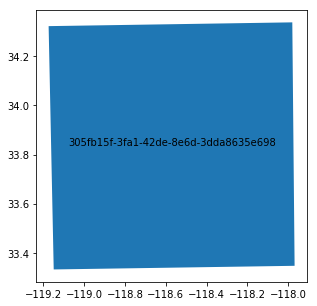

In [22]:
areas = api.to_geodataframe(products)
ax = areas.plot(column='uuid', cmap=None, figsize=(5,5))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [101]:
api.download('305fb15f-3fa1-42de-8e6d-3dda8635e698')

Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.09G/1.09G [21:18<00:00, 724kB/s]
MD5 checksumming: 100%|████████████████████████████████████████████████████████████| 1.09G/1.09G [00:03<00:00, 315MB/s]


{'id': '305fb15f-3fa1-42de-8e6d-3dda8635e698',
 'title': 'S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_20190628T222303',
 'size': 1092181482,
 'md5': '02DA4AE086EEB0D864105225EF150746',
 'date': datetime.datetime(2019, 6, 28, 18, 29, 29, 24000),
 'footprint': 'POLYGON((-119.17378 34.3223655300343,-117.98062 34.3377366079947,-117.969376 33.347577738129736,-119.148865 33.3327671075422,-119.17378 34.3223655300343))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('305fb15f-3fa1-42de-8e6d-3dda8635e698')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 6, 29, 11, 30, 28, 165000),
 'Ingestion Date': datetime.datetime(2019, 6, 29, 11, 29, 13, 869000),
 'path': '.\\S2B_MSIL2A_20190628T182929_N0212_R027_T11SLT_20190628T222303.zip',
 'downloaded_bytes': 1092181482}

In [23]:
R10 = r'C:\Users\amans\OneDrive\Desktop\State of place\Los angeles\GRANULE\L2A_T11SLT_A012065_20190628T184456\IMG_DATA\R10m'
b4 = rasterio.open(R10+'/T11SLT_20190628T182929_B04_10m.jp2')
b3 = rasterio.open(R10+'/T11SLT_20190628T182929_B03_10m.jp2')
b2 = rasterio.open(R10+'/T11SLT_20190628T182929_B02_10m.jp2')
b8 = rasterio.open(R10+'/T11SLT_20190628T182929_B08_10m.jp2')


# Create an RGB image 
with rasterio.open('LA.tiff','w',driver='Gtiff', width=b2.width, height=b2.height, 
              count=3,crs=b2.crs,transform=b2.transform, dtype=b2.dtypes[0]) as rgb:
    rgb.write(b2.read(1),3) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),1)
    #rgb.write(b8.read(1),4)
    rgb.close()

In [24]:
src = rasterio.open('LA.tiff')
src.crs

CRS.from_epsg(32611)

In [25]:
la_proj = labounds.to_crs({'init': 'epsg:2955'})

with rasterio.open("LA.tiff") as src:
    out_image, out_transform = rasterio.mask.mask(src, la_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("LA_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


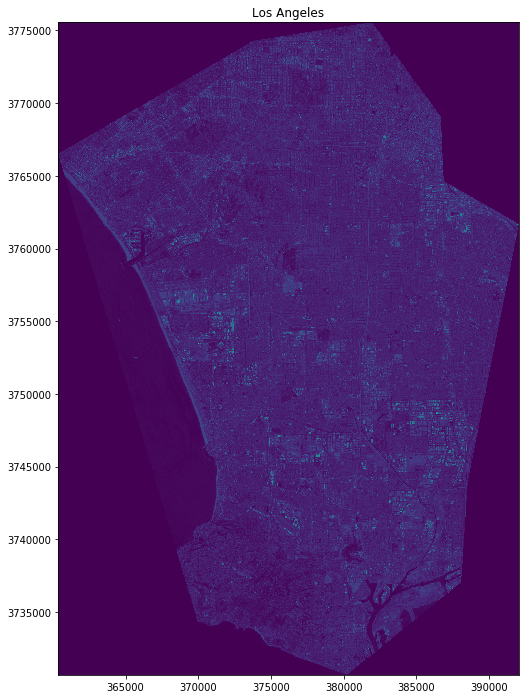

In [26]:
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\LA_masked.tif')
plt.figure(figsize=(12,12))
plt.title('Los Angeles')
plot.show(src, adjust='linear')

Text(0.5, 1.0, 'Zoomed image of Los Angeles')

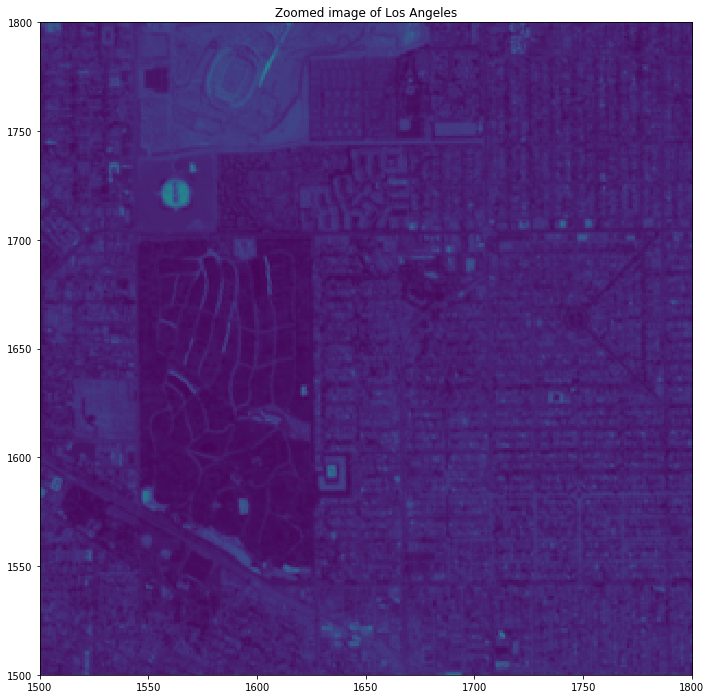

In [27]:
ds = gdal.Open(r'C:\Users\amans\OneDrive\Desktop\State of place\LA_masked.tif', gdal.GA_ReadOnly)
img_gdal = ds.GetRasterBand(1).ReadAsArray()

plt.figure(figsize=(12,12))
plt.xlim(1500, 1800)
plt.ylim(1500, 1800)
plt.imshow(img_gdal)
plt.title('Zoomed image of Los Angeles')

Miami

In [29]:
m = folium.Map([25.76, -80.19], zoom_start=11)
miami_bound = gpd.read_file(r'C:\Users\amans\OneDrive\Desktop\State of place\miami\layers\POLYGON.shp')
folium.GeoJson(miami_bound).add_to(m)
m

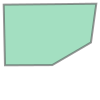

In [30]:
fp_miami = None
for i in miami_bound['geometry']:
    fp_miami = i
    
fp_miami

In [127]:
products_miami = api.query(fp_miami,
                     date = ('20190601', '20190726'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,20)
                    )

In [64]:
products_gdf = api.to_geodataframe(products_miami)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

title  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  S2B_MSIL2A_20190620T160519_N0212_R054_T17RNJ_2...   
17dcd472-c473-4388-a1e0-06580f7e50e8  S2A_MSIL2A_20190625T160521_N0212_R054_T17RNJ_2...   

                                                                                   link  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
17dcd472-c473-4388-a1e0-06580f7e50e8  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
17dcd472-c473-4388-a1e0-06580f7e50e8  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
17dcd472-c473-4388-a1e0-06580f7e50e8  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                                summary  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  Date: 2019-06-20T16:05:19.024Z, Instrument: MS...   
17dcd472-c473-4388-a1e0-06580f7e50e8  Date: 2019-06-25T16:05:21.024Z, Instrument: MS...   

                                               beginposition  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01 2019-06-20 16:05:19.024   
17dcd472-c473-4388-a1e0-06580f7e50e8 2019-06-25 16:05:21.024   

                                                 endposition  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01 2019-06-20 16:05:19.024   
17dcd472-c473-4388-a1e0-06580f7e50e8 2019-06-25 16:05:21.024   

                                               ingestiondate  orbitnumber  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01 2019-06-21 02:52:39.682        11949   
17dcd472-c473-4388-a1e0-06580f7e50e8 2019-06-26 07:34:22.259        20929   

                                      relativeorbitnumber  ...  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01                   54  ...   
17dcd472-c473-4388-a1e0-06580f7e50e8                   54  ...   

                                      processingbaseline  processinglevel  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01               02.12         Level-2A   
17dcd472-c473-4388-a1e0-06580f7e50e8               02.12         Level-2A   

                                      producttype  platformname        size  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01      S2MSI2A    Sentinel-2     1.03 GB   
17dcd472-c473-4388-a1e0-06580f7e50e8      S2MSI2A    Sentinel-2  1017.08 MB   

                                                                               filename  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  S2B_MSIL2A_20190620T160519_N0212_R054_T17RNJ_2...   
17dcd472-c473-4388-a1e0-06580f7e50e8  S2A_MSIL2A_20190625T160521_N0212_R054_T17RNJ_2...   

                                                                   level1cpdiidentifier  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  S2B_OPER_MSI_L1C_TL_SGS__20190620T192213_A0119...   
17dcd472-c473-4388-a1e0-06580f7e50e8  S2A_OPER_MSI_L1C_TL_SGS__20190625T192536_A0209...   

                                                                             identifier  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  S2B_MSIL2A_20190620T160519_N0212_R054_T17RNJ_2...   
17dcd472-c473-4388-a1e0-06580f7e50e8  S2A_MSIL2A_20190625T160521_N0212_R054_T17RNJ_2...   

                                                                      uuid  \
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  f4a7c4b2-70ba-477f-9a9d-465e03d83f01   
17dcd472-c473-4388-a1e0-06580f7e50e8  17dcd472-c473-4388-a1e0-06580f7e50e8   

                                                                               geometry  
f4a7c4b2-70ba-477f-9a9d-465e03d83f01  MULTIPOLYGON (((-79.91016 25.22439, -79.90109 ...  
17dcd472-c473-4388-a1e0-06580f7e50e8  MULTIPOLYGON (((-79.91016 25.22439, -79.90109 ...  

[2 rows x 35 columns]

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


17dcd472-c473-4388-a1e0-06580f7e50e8    Annotation(-80.4529, 25.7228, '17dcd472-c473-4...
f4a7c4b2-70ba-477f-9a9d-465e03d83f01    Annotation(-80.4529, 25.7228, 'f4a7c4b2-70ba-4...
dtype: object

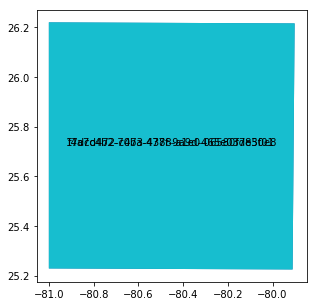

In [17]:
areas = api.to_geodataframe(products_miami)
ax = areas.plot(column='uuid', cmap=None, figsize=(5,5))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [19]:
api.download('17dcd472-c473-4388-a1e0-06580f7e50e8')

Downloading: 100%|████████████████████████████████████████████████████████████████| 1.07G/1.07G [16:10<00:00, 1.10MB/s]
MD5 checksumming: 100%|████████████████████████████████████████████████████████████| 1.07G/1.07G [00:09<00:00, 115MB/s]


{'id': '17dcd472-c473-4388-a1e0-06580f7e50e8',
 'title': 'S2A_MSIL2A_20190625T160521_N0212_R054_T17RNJ_20190625T200319',
 'size': 1066543426,
 'md5': '187A219876C7FA5EA10017828E185FDD',
 'date': datetime.datetime(2019, 6, 25, 16, 5, 21, 24000),
 'footprint': 'POLYGON((-81.00021 26.21992939663604,-79.90109 26.215729688692694,-79.91016 25.22439454095876,-81.00021 25.228413153186533,-81.00021 26.21992939663604))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('17dcd472-c473-4388-a1e0-06580f7e50e8')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 6, 26, 9, 55, 2, 135000),
 'Ingestion Date': datetime.datetime(2019, 6, 26, 7, 34, 22, 259000),
 'path': '.\\S2A_MSIL2A_20190625T160521_N0212_R054_T17RNJ_20190625T200319.zip',
 'downloaded_bytes': 1066543426}

In [31]:
R10 = r'C:\Users\amans\OneDrive\Desktop\State of place\miami\sentinel_data\GRANULE\L2A_T17RNJ_A020929_20190625T160516\IMG_DATA\R10m'
b4 = rasterio.open(R10+'/T17RNJ_20190625T160521_B04_10m.jp2')
b3 = rasterio.open(R10+'/T17RNJ_20190625T160521_B03_10m.jp2')
b2 = rasterio.open(R10+'/T17RNJ_20190625T160521_B02_10m.jp2')
b8 = rasterio.open(R10+'/T17RNJ_20190625T160521_B08_10m.jp2')


# Create an RGB image 
with rasterio.open('miami.tiff','w',driver='Gtiff', width=b2.width, height=b2.height, 
              count=3,crs=b2.crs,transform=b2.transform, dtype=b2.dtypes[0]) as rgb:
    rgb.write(b4.read(1),1) #blue
    rgb.write(b3.read(1),2) #green
    rgb.write(b2.read(1),3) #red
    #rgb.write(b8.read(1),4)
    rgb.close()

In [32]:
src = rasterio.open('miami.tiff')
src.crs

CRS.from_epsg(32617)

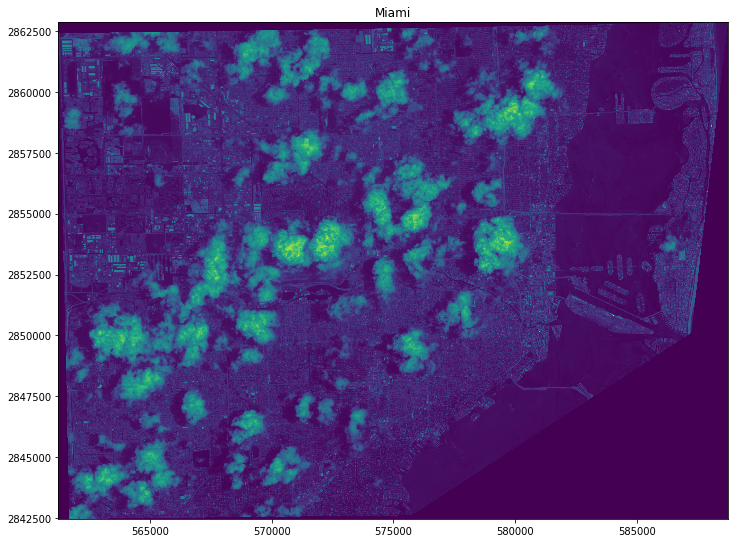

In [33]:
miamiproj = miami_bound.to_crs({'init': 'epsg:32617'})

with rasterio.open("miami.tiff") as src:
    out_image, out_transform = rasterio.mask.mask(src, miamiproj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("miami_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\miami_masked.tif')
plt.figure(figsize=(12,12))
plt.title('Miami')
plot.show(src, adjust='linear')

Philadelphia

In [34]:
m = folium.Map([39.9, -75.1], zoom_start=10)
phl_bound = gpd.read_file(r'C:\Users\amans\OneDrive\Desktop\State of place\philadelphia.geojson')
folium.GeoJson(phl_bound).add_to(m)
m

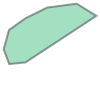

In [35]:
fp_phl = None
for i in phl_bound['geometry']:
    fp_phl = i
    
fp_phl

In [149]:
products_phl = api.query(fp_phl,
                     date = ('20190601', '20190826'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,10)
                    )

In [153]:
products_gdf = api.to_geodataframe(products_phl)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted.head()

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


title  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608  S2B_MSIL2A_20190730T154819_N0213_R054_T18TVK_2...   
e110e740-e2f9-4940-ae01-9bb9937edfaa  S2A_MSIL2A_20190725T154911_N0213_R054_T18TVK_2...   
799b1b25-5cb1-4bb5-9e6b-61778eeb72e9  S2A_MSIL2A_20190715T154911_N0213_R054_T18TWK_2...   
19f1f37e-f512-4df4-9db4-341f1f52dc28  S2B_MSIL2A_20190730T154819_N0213_R054_T18TWK_2...   
dfc29797-61d4-4af2-97e7-284bafa473c2  S2B_MSIL2A_20190727T153819_N0213_R011_T18TVK_2...   

                                                                                   link  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
e110e740-e2f9-4940-ae01-9bb9937edfaa  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
799b1b25-5cb1-4bb5-9e6b-61778eeb72e9  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
19f1f37e-f512-4df4-9db4-341f1f52dc28  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
dfc29797-61d4-4af2-97e7-284bafa473c2  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
e110e740-e2f9-4940-ae01-9bb9937edfaa  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
799b1b25-5cb1-4bb5-9e6b-61778eeb72e9  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
19f1f37e-f512-4df4-9db4-341f1f52dc28  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
dfc29797-61d4-4af2-97e7-284bafa473c2  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
e110e740-e2f9-4940-ae01-9bb9937edfaa  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
799b1b25-5cb1-4bb5-9e6b-61778eeb72e9  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
19f1f37e-f512-4df4-9db4-341f1f52dc28  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
dfc29797-61d4-4af2-97e7-284bafa473c2  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                                summary  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608  Date: 2019-07-30T15:48:19.024Z, Instrument: MS...   
e110e740-e2f9-4940-ae01-9bb9937edfaa  Date: 2019-07-25T15:49:11.024Z, Instrument: MS...   
799b1b25-5cb1-4bb5-9e6b-61778eeb72e9  Date: 2019-07-15T15:49:11.024Z, Instrument: MS...   
19f1f37e-f512-4df4-9db4-341f1f52dc28  Date: 2019-07-30T15:48:19.024Z, Instrument: MS...   
dfc29797-61d4-4af2-97e7-284bafa473c2  Date: 2019-07-27T15:38:19.024Z, Instrument: MS...   

                                               beginposition  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608 2019-07-30 15:48:19.024   
e110e740-e2f9-4940-ae01-9bb9937edfaa 2019-07-25 15:49:11.024   
799b1b25-5cb1-4bb5-9e6b-61778eeb72e9 2019-07-15 15:49:11.024   
19f1f37e-f512-4df4-9db4-341f1f52dc28 2019-07-30 15:48:19.024   
dfc29797-61d4-4af2-97e7-284bafa473c2 2019-07-27 15:38:19.024   

                                                 endposition  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608 2019-07-30 15:48:19.024   
e110e740-e2f9-4940-ae01-9bb9937edfaa 2019-07-25 15:49:11.024   
799b1b25-5cb1-4bb5-9e6b-61778eeb72e9 2019-07-15 15:49:11.024   
19f1f37e-f512-4df4-9db4-341f1f52dc28 2019-07-30 15:48:19.024   
dfc29797-61d4-4af2-97e7-284bafa473c2 2019-07-27 15:38:19.024   

                                               ingestiondate  orbitnumber  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608 2019-07-31 03:49:55.374        12521   
e110e740-e2f9-4940-ae01-9bb9937edfaa 2019-07-26 04:04:24.602        21358   
799b1b25-5cb1-4bb5-9e6b-61778eeb72e9 2019-07-16 01:22:20.373        21215   
19f1f37e-f512-4df4-9db4-341f1f52dc28 2019-07-31 04:03:01.190        12521   
dfc29797-61d4-4af2-97e7-284bafa473c2 2019-07-28 00:08:25.431        12478   

                                      relativeorbitnumber  ...  \
d1ecaf57-e26e-43b9-b2c4-a50cb26c5608            

C:\Users\amans\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


17dcd472-c473-4388-a1e0-06580f7e50e8    Annotation(-80.4529, 25.7228, '17dcd472-c473-4...
f4a7c4b2-70ba-477f-9a9d-465e03d83f01    Annotation(-80.4529, 25.7228, 'f4a7c4b2-70ba-4...
dtype: object

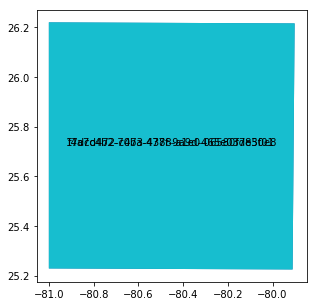

In [151]:
areas = api.to_geodataframe(products_miami)
ax = areas.plot(column='uuid', cmap=None, figsize=(5,5))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

In [155]:
api.download('d1ecaf57-e26e-43b9-b2c4-a50cb26c5608')

Downloading: 100%|████████████████████████████████████████████████████████████████| 1.20G/1.20G [27:07<00:00, 2.83MB/s]
MD5 checksumming: 100%|████████████████████████████████████████████████████████████| 1.20G/1.20G [00:10<00:00, 119MB/s]


{'id': 'd1ecaf57-e26e-43b9-b2c4-a50cb26c5608',
 'title': 'S2B_MSIL2A_20190730T154819_N0213_R054_T18TVK_20190730T194058',
 'size': 1202660704,
 'md5': '136483CF135579A0BE14DC10969D0A1F',
 'date': datetime.datetime(2019, 7, 30, 15, 48, 19, 24000),
 'footprint': 'POLYGON((-76.18317 40.64479480422486,-74.88455 40.65079881136531,-74.88623 39.66155122739065,-76.16614 39.655752572676114,-76.18317 40.64479480422486))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('d1ecaf57-e26e-43b9-b2c4-a50cb26c5608')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 7, 31, 3, 50, 11, 730000),
 'Ingestion Date': datetime.datetime(2019, 7, 31, 3, 49, 55, 374000),
 'path': '.\\S2B_MSIL2A_20190730T154819_N0213_R054_T18TVK_20190730T194058.zip',
 'downloaded_bytes': 1202660704}

In [37]:
small_phl = gpd.read_file(r'C:\Users\amans\OneDrive\Desktop\State of place\small_phl.geojson')


In [38]:
R10 = r'C:\Users\amans\OneDrive\Desktop\State of place\Philadelphia\S2B_MSIL2A_20190730T154819_N0213_R054_T18TVK_20190730T194058.SAFE\GRANULE\L2A_T18TVK_A012521_20190730T155818\IMG_DATA\R10m'
b4 = rasterio.open(R10+'/T18TVK_20190730T154819_B04_10m.jp2')
b3 = rasterio.open(R10+'/T18TVK_20190730T154819_B03_10m.jp2')
b2 = rasterio.open(R10+'/T18TVK_20190730T154819_B02_10m.jp2')
b8 = rasterio.open(R10+'/T18TVK_20190730T154819_B08_10m.jp2')


# Create an RGB image 
with rasterio.open('philadelphia.tiff','w',driver='Gtiff', width=b2.width, height=b2.height, 
              count=3,crs=b2.crs,transform=b2.transform, dtype=b2.dtypes[0]) as rgb:
    rgb.write(b4.read(1),1) #blue
    rgb.write(b3.read(1),2) #green
    rgb.write(b2.read(1),3) #red
    #rgb.write(b8.read(1),4)
    rgb.close()

In [39]:
src = rasterio.open('philadelphia.tiff')
src.crs

CRS.from_epsg(32618)

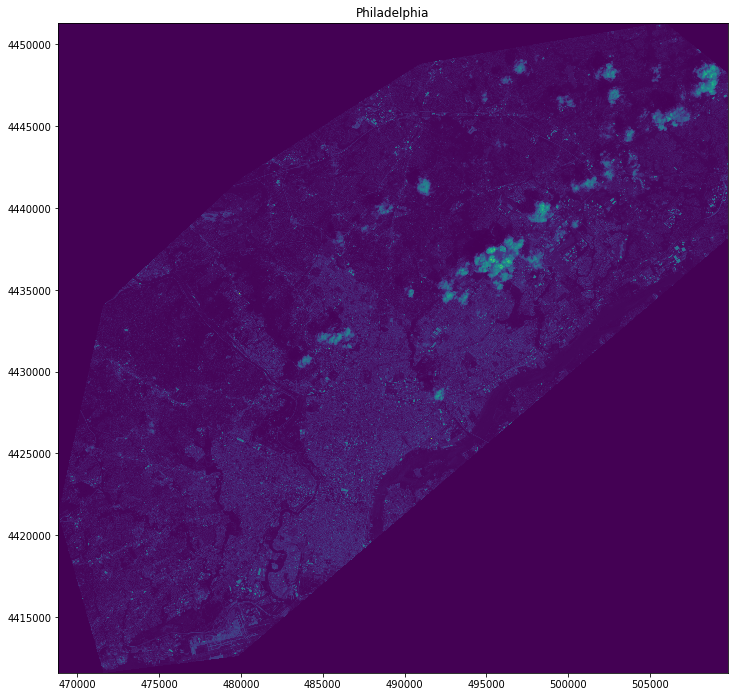

In [40]:
phlproj = phl_bound.to_crs({'init': 'epsg:32618'})

with rasterio.open("philadelphia.tiff") as src:
    out_image, out_transform = rasterio.mask.mask(src, phlproj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("phl_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\phl_masked.tif')
plt.figure(figsize=(12,12))
plt.title('Philadelphia')
plot.show(src, adjust='linear')

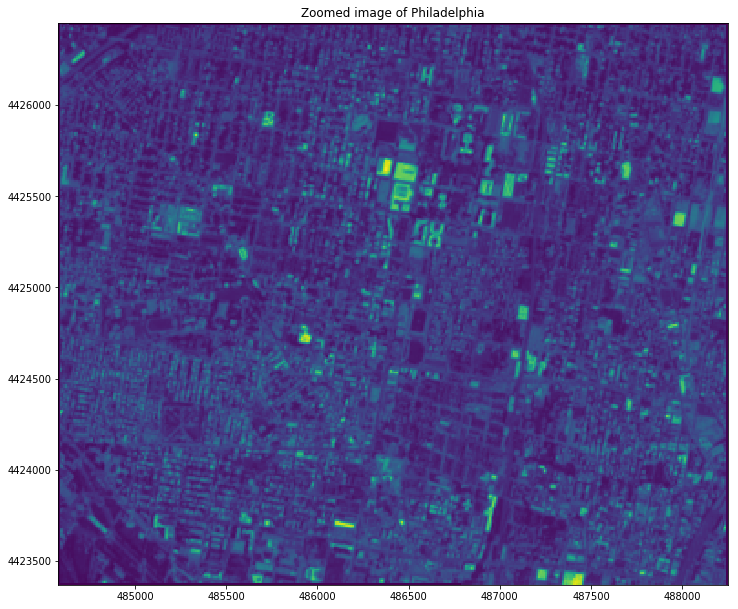

In [41]:
phlproj = small_phl.to_crs({'init': 'epsg:32618'})

with rasterio.open("philadelphia.tiff") as src:
    out_image, out_transform = rasterio.mask.mask(src, phlproj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("small_phl_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\small_phl_masked.tif')
plt.figure(figsize=(12,12))
plt.title('Zoomed image of Philadelphia')
plot.show(src, adjust='linear')

In [42]:
phl_block = gpd.read_file(r'C:\Users\amans\OneDrive\Desktop\State of place\phl_block.geojson')

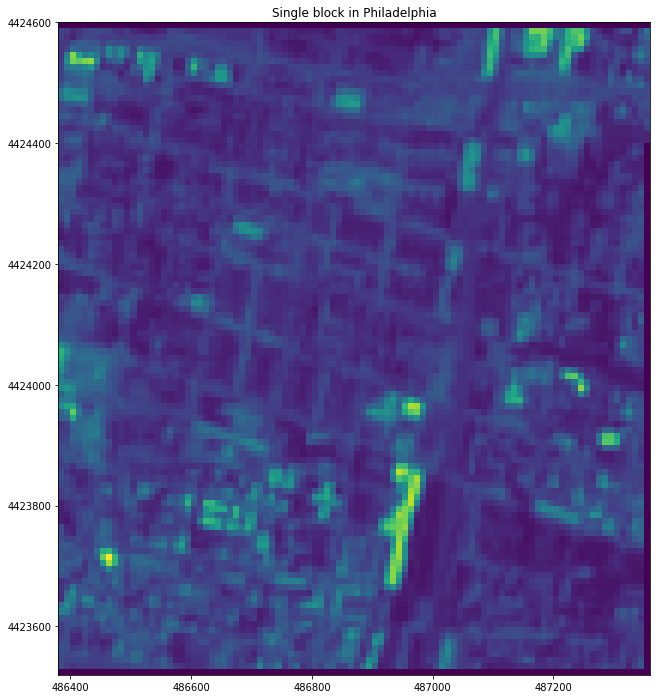

In [43]:
phlproj = phl_block.to_crs({'init': 'epsg:32618'})

with rasterio.open("philadelphia.tiff") as src:
    out_image, out_transform = rasterio.mask.mask(src, phlproj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("block_phl_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)
    
src = rasterio.open(r'C:\Users\amans\OneDrive\Desktop\State of place\block_phl_masked.tif')
plt.figure(figsize=(12,12))
plt.title('Single block in Philadelphia')
plot.show(src, adjust='linear')